# **Used Cars Price Prediction Using Machine Learning**
<img src="https://imgur.com/QgDU4Gv.png" width="900" height="600">

- Dataset Used: [Used Cars Dataset(371k Cars)](https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices)

- We'll train the machine learning model to predict the price of a second hand car given the information like seller, offerType, abtest, vehicleType, gearbox, powerPS, kilometer, fuelType etc.

- In this project, we analyse the [Used Cars Dataset(371k Cars)](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data), which has information about '371k' cars listed in the Used Car Market.

- The dataset has 371k rows and 21 columns

---


## **Steps Followed**


---

1. Download the dataset
2. Data Cleaning and Feature Engineering
2. Exploratory Analysis and Visualization
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions
6. Train & evaluate different models
7. Tune hyperparameters for the best models
8. Summary and References


---

## How to Run the Code :

---

The best way to learn the material is to execute the code and experiment with it yourself. This tutorial is an executable [Jupyter notebook](https://jupyter.org). You can _run_ this tutorial and experiment with the code examples in a couple of ways: *using free online resources* (recommended) or *on your computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. You can also select "Run on Colab" or "Run on Kaggle", but you'll need to create an account on [Google Colab](https://colab.research.google.com) or [Kaggle](https://kaggle.com) to use these platforms.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions

---


## **Download The Dataset**


---

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files

In [92]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

In [93]:
!pip install --upgrade plotly --quiet

Let's begin by importing`matplotlib.pyplot`, `seaborn`, and `plotly`

These are the three visualisation libraries that we will be using to visualise our data.

In [94]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#####  To Download the data, We'll use the opendatasets library: https://github.com/JovianML/opendatasets

In [95]:
import opendatasets as od

In [96]:
dataset_url = 'https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices' #Dataset used in the project

In [97]:
import opendatasets as od
od.download(dataset_url) #Downloading the dataset

Skipping, found downloaded files in "./uncovering-factors-that-affect-used-car-prices" (use force=True to force download)


The dataset has been downloaded and extracted.

In [98]:
data_dir = 'uncovering-factors-that-affect-used-car-prices'

In [99]:
import os
os.listdir(data_dir)

['autos.csv']

#####  Now, Let us view the dataset files : The Size of the File and Number of Lines

In [100]:
!ls -lh {data_dir}

total 68M
-rw-r--r-- 1 root root 68M Jun 27 12:43 autos.csv


In [101]:
!wc -l {data_dir}/autos.csv

371825 uncovering-factors-that-affect-used-car-prices/autos.csv


So, The file size is 68MB and there are ~371k rows of data

---


## **Data Cleaning and Feature Engineering**


---

Steps:

- Handling Null Values
- Check Ranges and negatives values
- Handling Duplicate Values
- Creating training/validation/test split

In [102]:
import pandas as pd #importing pandas library to work on dataframes
import numpy as np   #importing numpy library to use python array functions

In [103]:
usedcars_csv = 'uncovering-factors-that-affect-used-car-prices/autos.csv'

In [104]:
%%time
usedcars_df = pd.read_csv(usedcars_csv, low_memory=False)
usedcars_df

CPU times: user 2.72 s, sys: 314 ms, total: 3.03 s
Wall time: 3.61 s


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,...,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,...,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,...,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,...,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


We can see that it took 1.77 sec to read 371k rows of data.

In [105]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

'dateCrawled', 'dateCreated', and 'lastSeen' should be datetime type. It is preffered to convert them prior to use of 'describe' as it will provide more info for these columns. Some of the columns have missing data, which needs to be analyzed.



In [106]:
usedcars_df['dateCrawled']=pd.to_datetime(usedcars_df['dateCrawled'])
usedcars_df['dateCreated']=pd.to_datetime(usedcars_df['dateCreated'])
usedcars_df['lastSeen']=pd.to_datetime(usedcars_df['lastSeen'])

<Axes: >

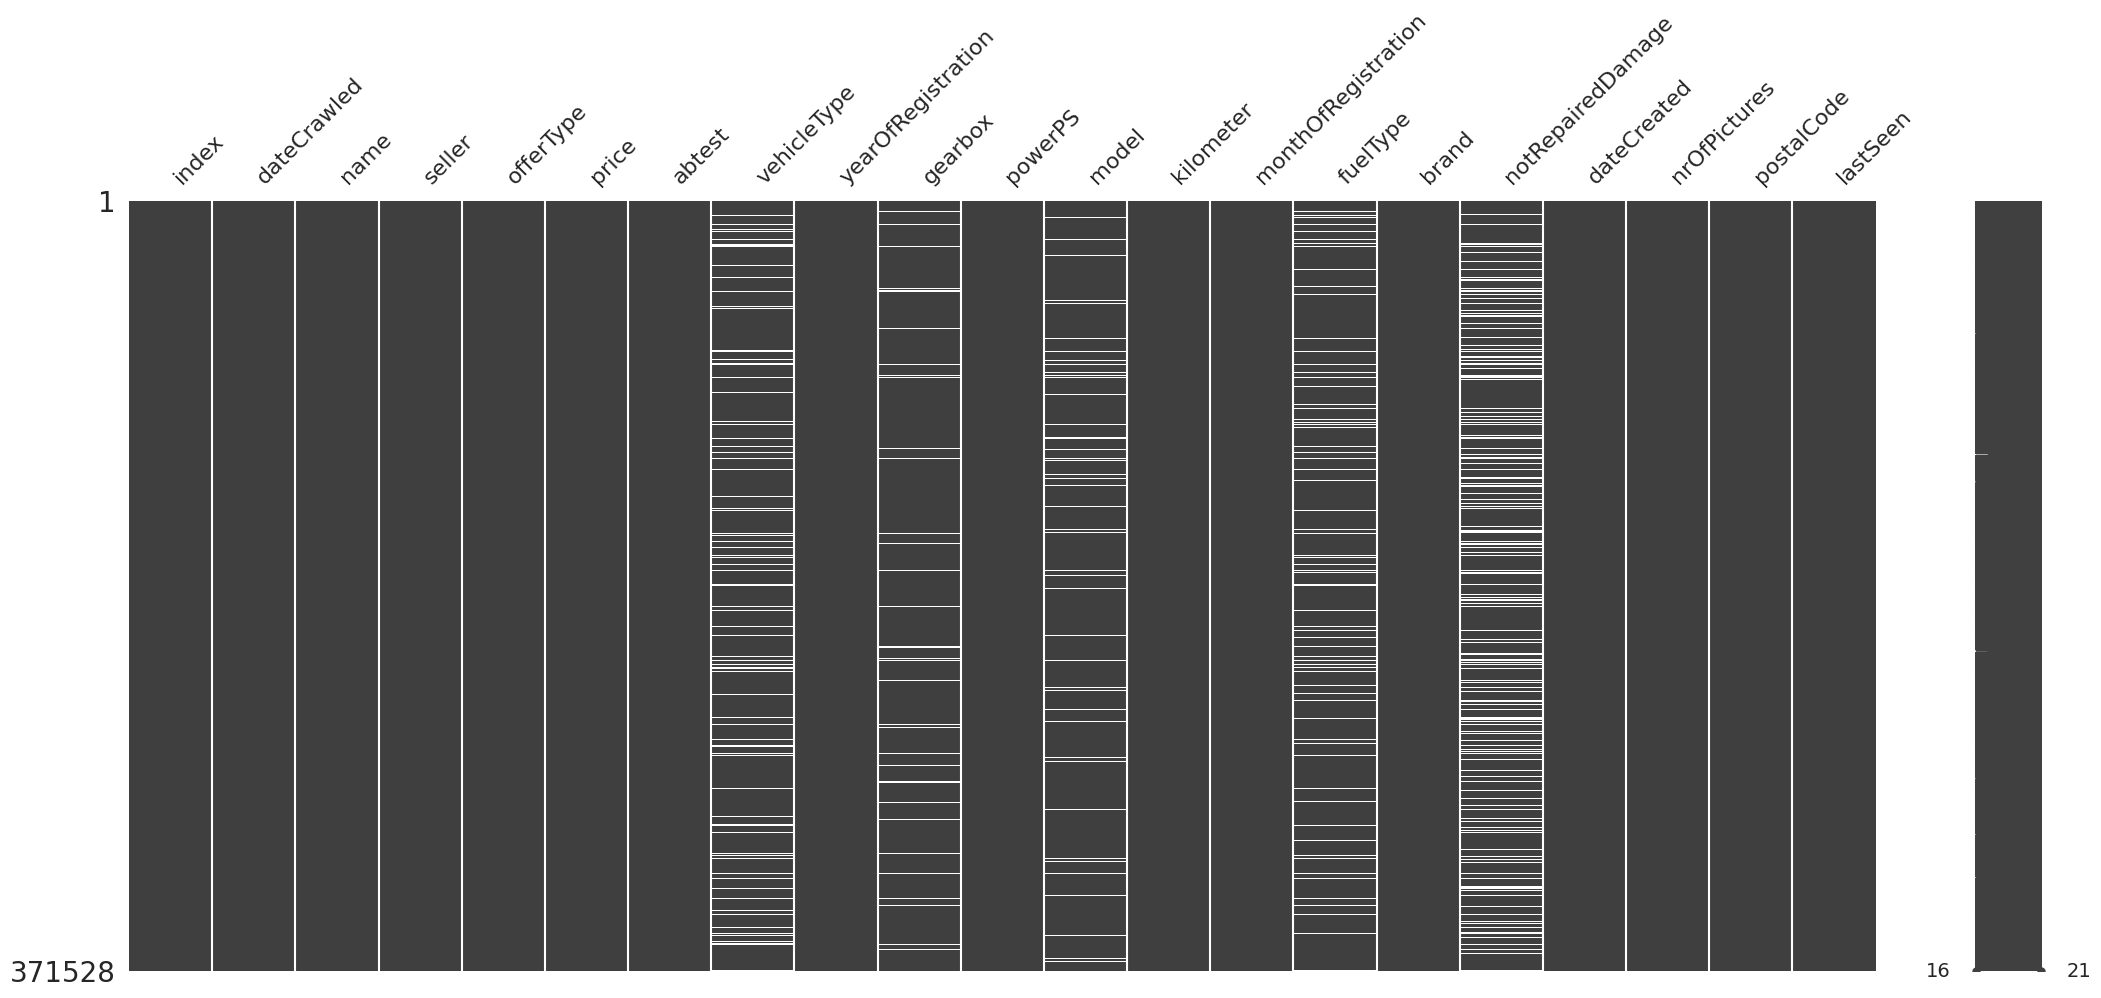

In [107]:
import missingno as msno
msno.matrix(usedcars_df)

The data is mostly intact and can be fetched. However, the variation of all fetures needs to analyzed prior to updating NULL.

In [108]:
usedcars_df.describe().round(3) #describe() function is used to get statistical info about numerical columns

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,371528.00,3.715280e+05,371528.000,371528.000,371528.000,371528.000,371528.0,371528.000
mean,185763.50,1.729514e+04,2004.578,115.549,125618.688,5.734,0.0,50820.668
std,107251.04,3.587954e+06,92.867,192.140,40112.337,3.712,0.0,25799.082
min,0.00,0.000000e+00,1000.000,0.000,5000.000,0.000,0.0,1067.000
25%,92881.75,1.150000e+03,1999.000,70.000,125000.000,3.000,0.0,30459.000
50%,185763.50,2.950000e+03,2003.000,105.000,150000.000,6.000,0.0,49610.000
75%,278645.25,7.200000e+03,2008.000,150.000,150000.000,9.000,0.0,71546.000
max,371527.00,2.147484e+09,9999.000,20000.000,150000.000,12.000,0.0,99998.000


It should be noted that 'yearOfRegistration', 'price', and 'powerPS' may contain outliers based on the overview above.

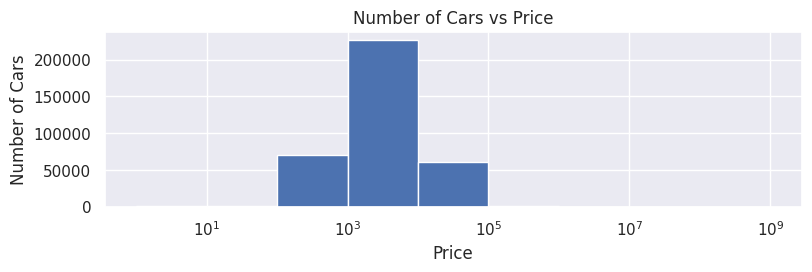

In [109]:
logbins = np.logspace(0,9,10)
plt.subplot(212)
plt.hist(usedcars_df['price'], bins=logbins)
plt.xscale('log')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.title("Number of Cars vs Price")
plt.show()

Here we can see that most of car price lies between \$100 to $100000.

In [110]:
usedcars_df[usedcars_df['price']>10**5]['price'].count()


403

'price' for most vehicles is within 10^5. 403 samples scews data as std() of 'price' is 10^6 whereas, most of the data lies within 0 to 10^5.These samples will scew the model, as the model will attempt to fit these outliers as the cost associated with these data points will be high.Therefore, these outliers points needs to be discarded.



In [111]:
usedcars_df=usedcars_df[usedcars_df['price']<10**5]


The removal of 403 samples (approx. 1% data) reduced price.std() multifold while retaining the characterstics of other features.

In [112]:
usedcars_df[usedcars_df['price'] == 0]['price'].count()

10778

In [113]:
usedcars_df=usedcars_df[usedcars_df['price'] > 0]
usedcars_df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,360341.000000,360341.000000,360341.000000,360341.000000,360341.000000,360341.000000,360341.0,360341.000000
mean,185803.216895,5773.965583,2004.420380,116.296786,125737.565251,5.796651,0.0,50991.885314
std,107255.588646,7541.714865,80.215419,188.785686,39751.678231,3.684735,0.0,25760.413729
min,0.000000,1.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,92886.000000,1250.000000,1999.000000,72.000000,125000.000000,3.000000,0.0,30823.000000
50%,185834.000000,3000.000000,2004.000000,105.000000,150000.000000,6.000000,0.0,49744.000000
75%,278691.000000,7450.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71672.000000
max,371527.000000,99999.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Here we can see that there are 10k cars having the price zero , So therefore there is no point in predicting zero priced car so we are removing those rows as well.

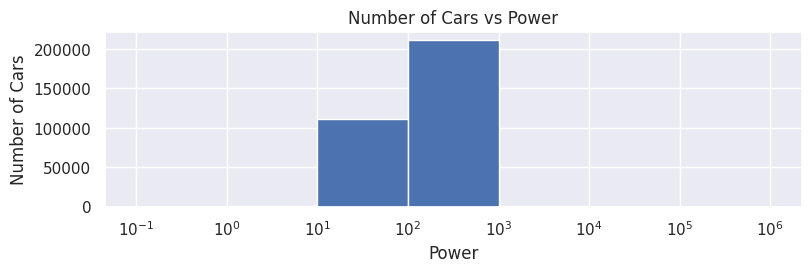

In [114]:
logbins=np.logspace(-1,6,8)
plt.subplot(212)
plt.hist(usedcars_df['powerPS'], logbins)
plt.xscale('log')
plt.xlabel('Power')
plt.ylabel('Number of Cars')
plt.title("Number of Cars vs Power")
plt.show()

Here we can see that most of car power lies between 10hp to 100hp.

In [115]:
print(usedcars_df[usedcars_df["powerPS"]<10]["powerPS"].count())
print(usedcars_df[usedcars_df["powerPS"]>10**3]["powerPS"].count())

37097
288


powerPS of vehicle can not be zero or less than 10. powerPS of vehicle of same model/type are typically in the same range.

Text(0.5, 1.0, 'Model vs Power')

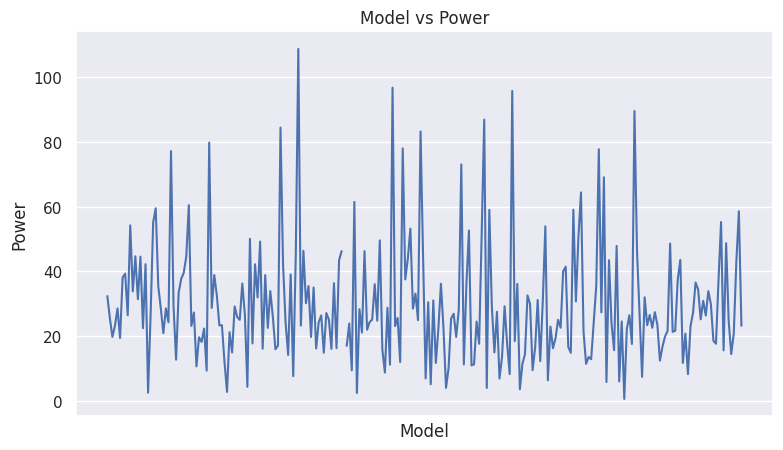

In [121]:
plt.plot(usedcars_df[(usedcars_df['powerPS']>10)&(usedcars_df['powerPS']<10**3)].groupby(['model'])['powerPS'].std())
plt.xticks([])
plt.xlabel('Model')
plt.ylabel('Power')
plt.title("Model vs Power")


Here we can see that all the model of cars having the power between 10hp to 1000hp. Since there are 251 unique values for model of cars So we have removed xticks in order ovoid overlapping.

Text(0.5, 1.0, 'VehicleType vs Power')

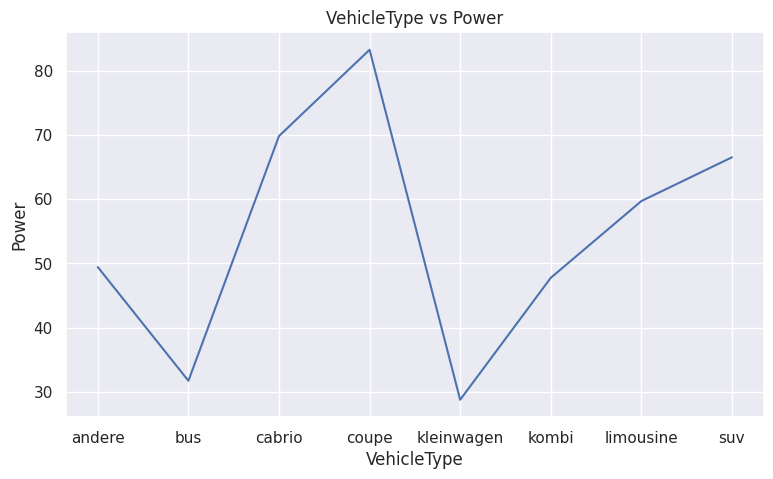

In [89]:
plt.plot(usedcars_df[(usedcars_df['powerPS']>10)&(usedcars_df['powerPS']<10**3)].groupby(['vehicleType'])['powerPS'].std())
plt.xlabel('VehicleType')
plt.ylabel('Power')
plt.title("VehicleType vs Power")

powerPS.std() is lower for model based agg than vehicletype agg, as vehicletype is more broader category. Therefore, first let's use powerPS.mean() based on model, and for vehicles for which model is missing let's use vehicletype, and for remaining mean of all vehicles.

In [33]:
modelPowerPSdf = pd.DataFrame(usedcars_df[(usedcars_df['model'].notna())&(usedcars_df['powerPS']>10)&(usedcars_df['powerPS']<10**3)].groupby(['model'])['powerPS'].mean())
modelPowerPSdf=modelPowerPSdf.reset_index()
usedcars_df=usedcars_df.merge(modelPowerPSdf, on ='model', suffixes=('', '_tomap'), how='left')
usedcars_df['powerPS'] = np.where((usedcars_df['powerPS_tomap'].notna())&(usedcars_df['model'].notna())&((usedcars_df['powerPS']>10**3)|(usedcars_df['powerPS']<10)), usedcars_df['powerPS_tomap'], usedcars_df['powerPS'])
usedcars_df.drop(['powerPS_tomap'],axis=1, inplace=True)
del modelPowerPSdf
usedcars_df[(usedcars_df['powerPS']<10)|(usedcars_df['powerPS']>10**3)]['powerPS'].count()

5311

Here we are inserted 5311 cars with mean value of power based on model which is in the range less than 10hp and greater than 1000hp.

In [34]:
vTypePowerPSdf = pd.DataFrame(usedcars_df[(usedcars_df['vehicleType'].notna())&(usedcars_df['powerPS']>10)&(usedcars_df['powerPS']<10**3)].groupby(['vehicleType'])['powerPS'].mean())
vTypePowerPSdf=vTypePowerPSdf.reset_index()
usedcars_df=usedcars_df.merge(vTypePowerPSdf, on ='vehicleType', suffixes=('', '_tomap'), how='left')
usedcars_df['powerPS'] = np.where((usedcars_df['powerPS_tomap'].notna())&(usedcars_df['vehicleType'].notna())&((usedcars_df['powerPS']>10**3)|(usedcars_df['powerPS']<10)), usedcars_df['powerPS_tomap'], usedcars_df['powerPS'])
usedcars_df.drop(['powerPS_tomap'],axis=1, inplace=True)
del vTypePowerPSdf
usedcars_df[(usedcars_df['powerPS']<10)|(usedcars_df['powerPS']>10**3)]['powerPS'].count()

2794

Here we are inserted 2794 cars with mean value of power based on vehicletype which is in the range less than 10hp and greater than 1000hp.

In [35]:
usedcars_df.loc[(usedcars_df['powerPS']<10)|(usedcars_df['powerPS']>10**3),'powerPS']=usedcars_df[(usedcars_df['powerPS']>10)&(usedcars_df['powerPS']<10**3)]['powerPS'].mean()

In [36]:
usedcars_df.describe()

,index,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,360341.000000,360341.000000,360341.000000,360341.000000,360341.000000,360341.000000,360341.0,360341.000000
mean,185803.216895,5773.965583,2004.420380,125.039271,125737.565251,5.796651,0.0,50991.885314
std,107255.588646,7541.714865,80.215419,60.431488,39751.678231,3.684735,0.0,25760.413729
min,0.000000,1.000000,1000.000000,10.000000,5000.000000,0.000000,0.0,1067.000000
25%,92886.000000,1250.000000,1999.000000,80.000000,125000.000000,3.000000,0.0,30823.000000
50%,185834.000000,3000.000000,2004.000000,116.000000,150000.000000,6.000000,0.0,49744.000000
75%,278691.000000,7450.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71672.000000
max,371527.000000,99999.000000,9999.000000,1000.000000,150000.000000,12.000000,0.0,99998.000000


**Feature Engineering**:

* Creating a new features from the existing features

In [37]:
usedcars_df['DaysOnMarket']=usedcars_df['lastSeen']-usedcars_df['dateCreated']
usedcars_df['DaysOnMarket']=usedcars_df['DaysOnMarket'].astype('timedelta64[D]')

Drop columns which are not to be used.

In [38]:
usedcars_df.drop(['index',
 'dateCrawled',
 'name',
 'yearOfRegistration',
 'model',
 'monthOfRegistration',
 'dateCreated',
 'nrOfPictures',
 'postalCode',
 'lastSeen'], axis=1, inplace=True)

In [39]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360341 entries, 0 to 360340
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   seller             360341 non-null  object 
 1   offerType          360341 non-null  object 
 2   price              360341 non-null  int64  
 3   abtest             360341 non-null  object 
 4   vehicleType        326258 non-null  object 
 5   gearbox            342682 non-null  object 
 6   powerPS            360341 non-null  float64
 7   kilometer          360341 non-null  int64  
 8   fuelType           330461 non-null  object 
 9   brand              360341 non-null  object 
 10  notRepairedDamage  293637 non-null  object 
 11  DaysOnMarket       360341 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 35.7+ MB


We see that by default float64 and integer64 bit datatypes are used, though the values that they have are not that large and can be stores in a 32bit datatype as well.

So let us convert these 64bit datatypes to 32bit so as to increase the speed and decrease the space that the datset holds.

In [40]:
usedcars_df['powerPS']=usedcars_df['powerPS'].astype('int32')
usedcars_df['kilometer']=usedcars_df['kilometer'].astype('int32')
usedcars_df['price']=usedcars_df['price'].astype('int32')

In [41]:
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360341 entries, 0 to 360340
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   seller             360341 non-null  object 
 1   offerType          360341 non-null  object 
 2   price              360341 non-null  int32  
 3   abtest             360341 non-null  object 
 4   vehicleType        326258 non-null  object 
 5   gearbox            342682 non-null  object 
 6   powerPS            360341 non-null  int32  
 7   kilometer          360341 non-null  int32  
 8   fuelType           330461 non-null  object 
 9   brand              360341 non-null  object 
 10  notRepairedDamage  293637 non-null  object 
 11  DaysOnMarket       360341 non-null  float64
dtypes: float64(1), int32(3), object(8)
memory usage: 31.6+ MB


Let us now proceed ahead, to check for the duplicate and missing values :

In [42]:
usedcars_df.duplicated().sum()

14965

In [43]:
usedcars_df=usedcars_df.drop_duplicates() #drop_duplicates() is used to drop all the duplicate entries in our dataframe

In [44]:
usedcars_df.shape # As we can see, we have removed the 14965 duplicate values

(345376, 12)

In [45]:
usedcars_df.isnull().sum() #isnull() along with sum() tells us the count for missing values

seller                   0
offerType                0
price                    0
abtest                   0
vehicleType          33581
gearbox              16472
powerPS                  0
kilometer                0
fuelType             29502
brand                    0
notRepairedDamage    64599
DaysOnMarket             0
dtype: int64

**We have the following options for dealing with missing values in numerical columns:**

1. Leave them as is, if they won't affect our analysis
2. Replace them with an average
3. Replace them with some other fixed value
4. Remove the rows containing missing values
5. Use the values from other rows & columns to estimate the missing value (imputation)

Now, Let us check column by column for all the columns where we have missing values to see what we can do about them and handle them in the best way possible

Column 1 : vehicle type

This column contains information about the Type of vehicle (e.g. SUV, sedan, etc.).

In [46]:
usedcars_df['vehicleType'].isnull().sum()

33581

In [47]:
usedcars_df['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

vehicles with nan vehicleType are updated with other/andere, rather than using mode because (i) logical to segregate as other which can be any of the type rather than fixing to one vehicleType, (ii) yields higher pearson correlation coefficient.

In [48]:
usedcars_df['vehicleType'] = usedcars_df['vehicleType'].fillna(value = 'andere')

In [49]:
usedcars_df['vehicleType'].unique()

array(['andere', 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio',
       'bus', 'kombi'], dtype=object)

Column 2 : gearbox

This column contains information about the Type of gearbox (manual or automatic).

In [50]:
usedcars_df['gearbox'].isnull().sum()

16472

In [51]:
usedcars_df['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [52]:
usedcars_df['gearbox'] = usedcars_df['gearbox'].fillna(value = 'Unknown')

In [53]:
usedcars_df['gearbox'].isnull().sum()
usedcars_df['gearbox'].unique()

array(['manuell', 'automatik', 'Unknown'], dtype=object)

Column 3 : fuel type

This column contains information about the Type of fuel (e.g. diesel, petrol, etc.).

In [54]:
usedcars_df['fuelType'].isnull().sum()

29502

In [55]:
usedcars_df['fuelType'].unique()

array(['benzin', 'diesel', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

vehicles with nan fuelType are updated with other/andere, rather than using mode because (i) logical to segregate as other which can be any of the type rather than fixing to one fueltype, (ii) yields higher pearson correlation coefficient.

In [56]:
usedcars_df['fuelType'] = usedcars_df['fuelType'].fillna(value = 'andere')

In [57]:
usedcars_df['fuelType'].unique()

array(['benzin', 'diesel', 'andere', 'lpg', 'hybrid', 'cng', 'elektro'],
      dtype=object)

Column 4 : not repaired damage

This column contains information about the Whether or not the car has any damage that has not been repaired.

In [58]:
usedcars_df['notRepairedDamage'].isnull().sum()

64599

69k+ data points have missing information for 'notRepairedDamage',which is 20% of data so use of mode may scew the data. Therefore, rather than using mode let's use factorize and then substitute -1(Nan) with either 0.5 or 0 (notRepairedDamage will not be avaiable if vehicle was not damaged, which is similar to !notRepairedDamage).

In [59]:
usedcars_df['notRepairedDamage']=pd.factorize(usedcars_df['notRepairedDamage'])[0]

In [60]:
usedcars_df['notRepairedDamage']

0        -1
1         0
2        -1
3         1
4         1
         ..
360336   -1
360337    1
360338    1
360339   -1
360340    1
Name: notRepairedDamage, Length: 345376, dtype: int64

In [61]:
usedcars_df['notRepairedDamage'].replace(-1,0, inplace=True)

In [62]:
usedcars_df['notRepairedDamage'].unique()

array([0, 1])

In [63]:
usedcars_df.shape

(345376, 12)

In [64]:
usedcars_df.isnull().sum() #isnull() along with sum() tells us the count for missing values

seller               0
offerType            0
price                0
abtest               0
vehicleType          0
gearbox              0
powerPS              0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
DaysOnMarket         0
dtype: int64


---


## **Exploratory Analysis and Visualization**


---


Here, we explore the various columns in our data and understand the data better.

This will also help us to have answers to some interesting questions deliveing meaningful insights from the data for a car buyer.


![](https://imgur.com/Ly9njh8.png)

In [65]:
usedcars_df.columns

Index(['seller', 'offerType', 'price', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage',
       'DaysOnMarket'],
      dtype='object')

In [66]:
usedcars_df

,seller,offerType,price,abtest,vehicleType,gearbox,powerPS,kilometer,fuelType,brand,notRepairedDamage,DaysOnMarket
0,privat,Angebot,480,test,andere,manuell,107,150000,benzin,volkswagen,0,14.0
1,privat,Angebot,18300,test,coupe,manuell,190,125000,diesel,audi,0,14.0
2,privat,Angebot,9800,test,suv,automatik,163,125000,diesel,jeep,0,22.0
3,privat,Angebot,1500,test,kleinwagen,manuell,75,150000,benzin,volkswagen,1,0.0
4,privat,Angebot,3600,test,kleinwagen,manuell,69,90000,diesel,skoda,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360336,privat,Angebot,2200,test,andere,Unknown,125,20000,andere,sonstige_autos,0,23.0
360337,privat,Angebot,1199,test,cabrio,automatik,101,125000,benzin,smart,1,6.0
360338,privat,Angebot,9200,test,bus,manuell,102,150000,diesel,volkswagen,1,19.0
360339,privat,Angebot,3400,test,kombi,manuell,100,150000,diesel,volkswagen,0,4.0


Let us analyse the numeric columns and their statistics in our dataset.

In [67]:
usedcars_df.describe().round(3)

,price,powerPS,kilometer,notRepairedDamage,DaysOnMarket
count,345376.000,345376.000,345376.000,345376.000,345376.000
mean,5830.305,125.305,125399.362,0.716,9.044
std,7611.684,60.671,39953.167,0.451,8.742
min,1.000,10.000,5000.000,0.000,0.000
25%,1250.000,80.000,100000.000,0.000,2.000
50%,3100.000,116.000,150000.000,1.000,6.000
75%,7500.000,150.000,150000.000,1.000,14.000
max,99999.000,1000.000,150000.000,1.000,759.000




*   **DaysOnMarket:** Here we can see that on an average, a car stays in the market for approximately 9 days before selling. Some cars move as fast as within a day, but then some might also take a lot longer as well.

*   **powerPS:** Most cars have a power of ~125, where the most powerful car has a horsepower of 1000, and the least power a car has is 10hp.


*   **Price** : The average price of a second hand car is 5666USD. We see that the minimum value is 1USD and the maximum value is 99999USD, as we removed outliers.

*   **Kilometer** : On an average most of the car have run 125000km, with a minimum of 5000km and the maximum of 150000km.

*   **notRepairedDamage** : As we have done factorization so it is comes to numerical column.


In [68]:
# heat map
usedcars_df.corr().style.background_gradient('Blues')

<ipython-input-68-cac126cee520>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  usedcars_df.corr().style.background_gradient('Blues')


,price,powerPS,kilometer,notRepairedDamage,DaysOnMarket
price,1.000000,0.566692,-0.415957,0.244870,0.131138
powerPS,0.566692,1.000000,-0.011524,0.115003,0.068635
kilometer,-0.415957,-0.011524,1.000000,-0.109825,-0.082090
notRepairedDamage,0.244870,0.115003,-0.109825,1.000000,0.077127
DaysOnMarket,0.131138,0.068635,-0.082090,0.077127,1.000000


* As we can see that powerPS has more correlation with the price column where as kilometer has negative correlation with price.

In [69]:
gearbox = usedcars_df['gearbox'].value_counts()

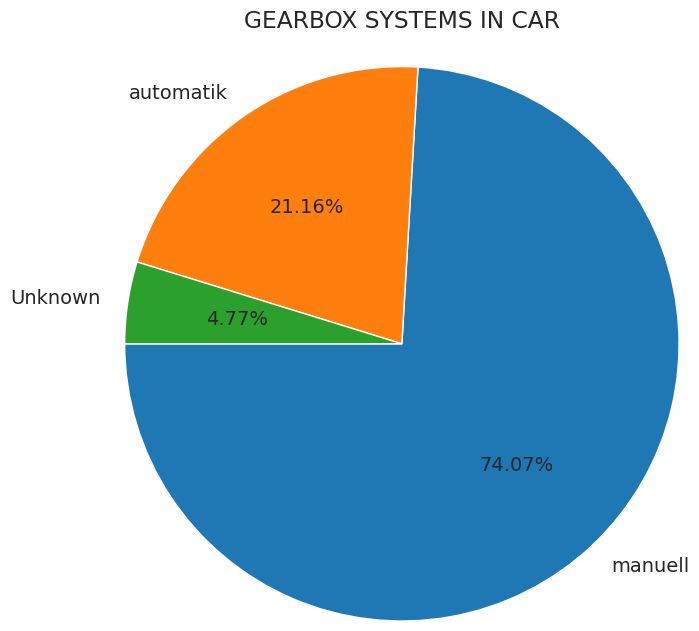

In [70]:
gearbox.plot.pie(autopct='%1.2f%%',radius=1.8,figsize=(5,5),startangle=180);
plt.title('GEARBOX SYSTEMS IN CAR', y= 1.3);

* So we have 2 types of gearbox, out of which most of the cars are a manuall gearbox Drive, followed by an Automatic, and then some of them are unknown.

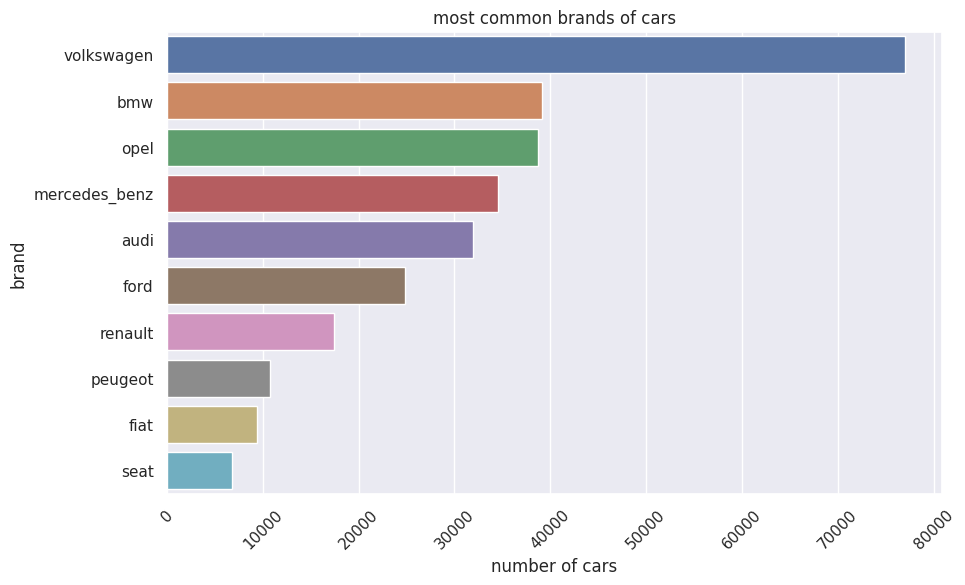

In [122]:
value_counts = usedcars_df['brand'].value_counts()
top_10_value_counts = value_counts.head(10)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='brand', data=usedcars_df, order=top_10_value_counts.index)
plt.title('most common brands of cars')
plt.xlabel('number of cars')
plt.xticks(rotation=45)
plt.show()

* As we can see here this are the top ten brand of cars that most common in the dataset.

* volkswagen brand of car is most common in the dataset.

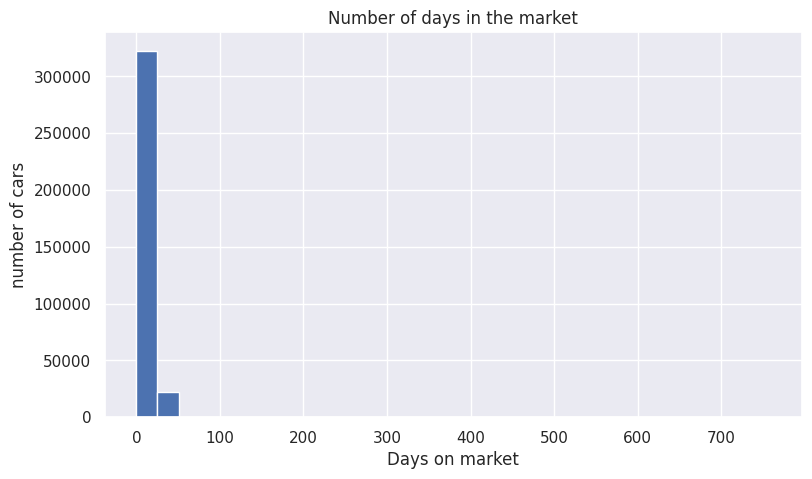

<Figure size 800x600 with 0 Axes>

In [72]:
column_data = usedcars_df['DaysOnMarket']

plt.hist(column_data, bins=30)
plt.xlabel('Days on market')
plt.ylabel('number of cars')
plt.title('Number of days in the market')
plt.figure(figsize=(8, 6))

plt.show()


* As we can see from the graph above, our initial idea that a car being on the market for ~700days is probably an outlier was true.

* We can clearly see that it is an outlier and 75% of the cars are sold within 50days of being in the market, with the median being 25 days.

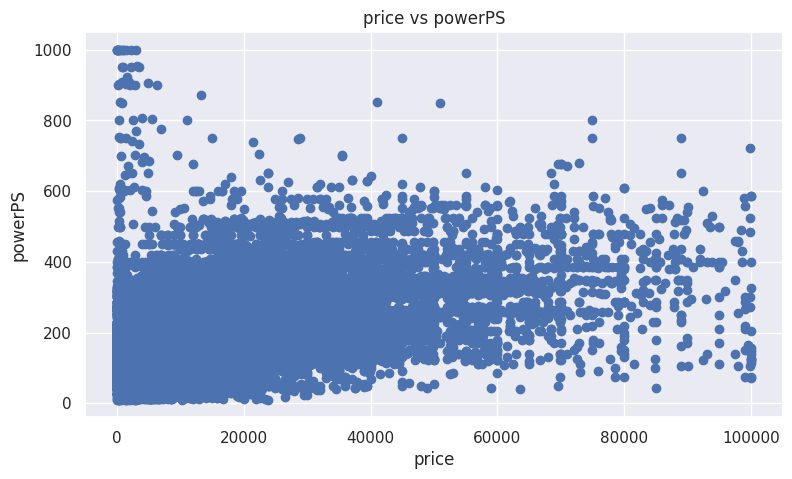

In [73]:
plt.scatter(usedcars_df['price'], usedcars_df['powerPS'])
plt.title('price vs powerPS')
plt.xlabel('price')
plt.ylabel('powerPS')
plt.show()

* As we can see that most of the car has power within 400 hp and price within $ 50k

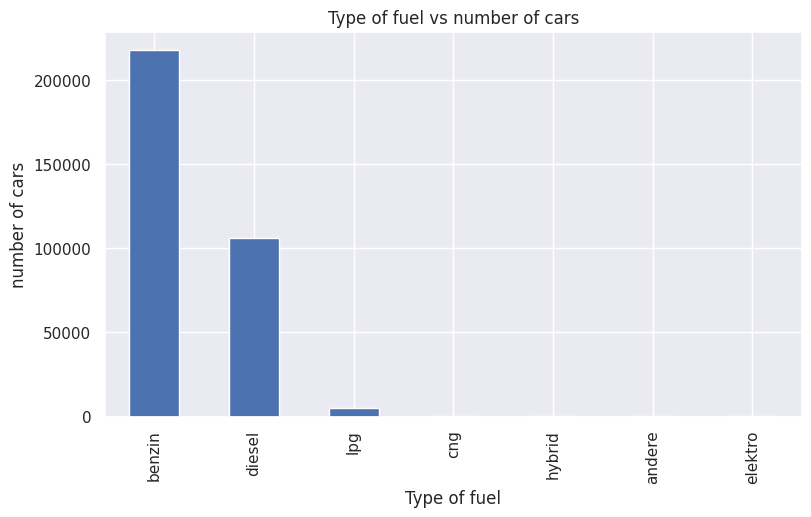

In [123]:
# Count the number of occurrences of each gearbox value
gearbox_counts = usedcars_df['fuelType'].value_counts()

# Create a bar plot
gearbox_counts.plot.bar()

plt.title('Type of fuel vs number of cars')
plt.xlabel('Type of fuel')
plt.ylabel('number of cars')

# Show the plot
plt.show()

* Very clearly, majority of the cars uses benzin fuel, followed by diesel, andere, lpg and then cng, hybrid, elecktro fueltype.

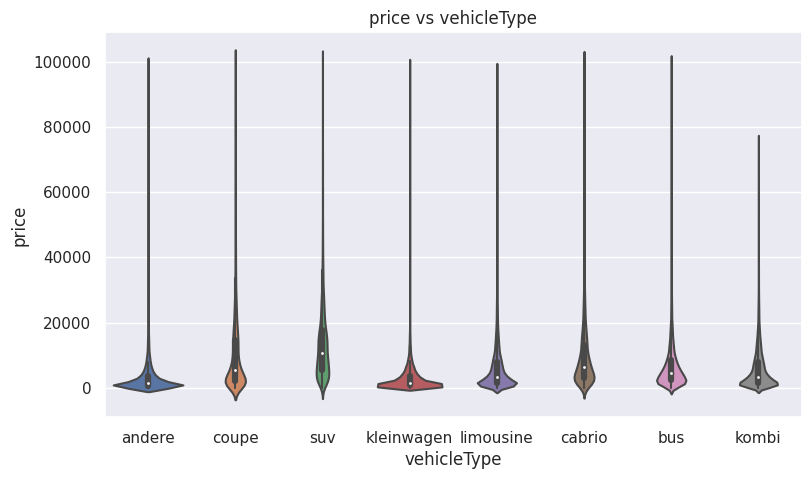

In [75]:
sns.violinplot(data=usedcars_df, x="vehicleType", y="price")
plt.title('price vs vehicleType')
plt.ylabel('price')
plt.xlabel('vehicleType')
plt.show()

* As we can see that most of the vehicle type lies below $ 20k price remaining are outliers.

* But for suv vehicle type the price distribution is spreads till $ 30k.


---


## **Prepare The Dataset For ML Training**


---

We will start by splitting the dataset into Training, Validation and Test Set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
train_val_df,test_df = train_test_split(usedcars_df,test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [ ]:
print(train_df.shape)

(207225, 12)


In [ ]:
print(val_df.shape)

(69075, 12)


In [ ]:
print(test_df.shape)

(69076, 12)


 **Identifying Input and Target Columns**

In the current dataset, we are using 'seller', 'offerType', 'abtest', 'vehicleType', 'gearbox','powerPS', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage','DaysOnMarket' as input columns and 'Price' column as that is the target.

In [ ]:
input_cols = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'powerPS', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage', 'DaysOnMarket']

In [ ]:
target_col = ['price']

We can now create Inputs and Target for training, validation and test sets for further processing and model training.

In [ ]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

Now, Let us look at the column datatypes

In [ ]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
numeric_cols

['powerPS', 'kilometer', 'notRepairedDamage', 'DaysOnMarket']

In [ ]:
categorical_cols = ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand']

In [ ]:
train_inputs[numeric_cols].describe()

,powerPS,kilometer,notRepairedDamage,DaysOnMarket
count,207225.000000,207225.000000,207225.000000,207225.000000
mean,125.301021,125344.818434,0.716308,9.034450
std,60.766034,39996.207788,0.450790,8.755879
min,10.000000,5000.000000,0.000000,0.000000
25%,80.000000,100000.000000,0.000000,2.000000
50%,116.000000,150000.000000,1.000000,6.000000
75%,150.000000,150000.000000,1.000000,14.000000
max,1000.000000,150000.000000,1.000000,759.000000


Lets check the number of categories in categorical columns

In [ ]:
train_inputs[categorical_cols].nunique()

seller          2
offerType       2
abtest          2
vehicleType     8
gearbox         3
fuelType        7
brand          40
dtype: int64

**Imputing Missing Numerical Data**

ML Models cannot work with missing data. The process of filling the empty values is called 'Imputation' .

There are several techniques of imputation like SimpleImputer etc.

Let us first check for the missing values in each numeric column.

In [ ]:
usedcars_df[numeric_cols].isna().sum()

powerPS              0
kilometer            0
notRepairedDamage    0
DaysOnMarket         0
dtype: int64

Since, we had already performed data cleaning before doing the exploratory analysis we do not have any empty values in the dataset now.

**Scaling The Numeric Features**

We will scale the numeric values to a small range of values, eg (0,1) or (-1,1), so that no particular feature has a disproportionate impact on our model.

Let us use MinMaxScaler from sklearn.preprocessing.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(usedcars_df[numeric_cols])

MinMaxScaler()

We can now inspect the min and max values in each column.

In [ ]:
list(scaler.data_min_)

[10.0, 5000.0, 0.0, 0.0]

In [ ]:
list(scaler.data_max_)

[1000.0, 150000.0, 1.0, 759.0]

We can now separately scale the training, validation and test sets using 'transform' method of scaler :

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Let us check how our data looks after scaling.

In [ ]:
train_inputs[numeric_cols].describe().loc[['min','max']]

,powerPS,kilometer,notRepairedDamage,DaysOnMarket
min,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore').fit(train_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

In [ ]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
x_train = train_inputs[numeric_cols + encoded_cols]

In [ ]:
x_val = val_inputs[numeric_cols + encoded_cols]

In [ ]:
x_test = test_inputs[numeric_cols + encoded_cols]

**Saving Processed Data**

In [ ]:
pd.DataFrame(x_train).to_parquet('x_train.parquet')

In [ ]:
pd.DataFrame(x_val).to_parquet('x_val.parquet')
pd.DataFrame(x_test).to_parquet('x_test.parquet')

In [ ]:
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

In [ ]:
x_train = pd.read_parquet('x_train.parquet')
x_val = pd.read_parquet('x_val.parquet')
x_test = pd.read_parquet('x_test.parquet')
train_target = pd.read_parquet('train_target.parquet')
val_target = pd.read_parquet('val_target.parquet')
test_target = pd.read_parquet('test_target.parquet')

---


## **Train Hardcoded & Baseline Models**


---


**Fixed/ Random Guess Model**

Lets define a model that always returns the mean price of all prices as a prediction.

In [ ]:
def return_mean(inputs):
    return np.full(len(inputs), usedcars_df.price.mean())

In [ ]:
train_preds = return_mean(x_train)

In [ ]:
train_preds

array([5830.30528178, 5830.30528178, 5830.30528178, ..., 5830.30528178,
       5830.30528178, 5830.30528178])

In [ ]:
mean_squared_error(train_preds, train_target, squared=False)

7553.294396447314

In [ ]:
mean_squared_error(return_mean(x_val), val_target, squared=False)

7657.721574966919

In [ ]:
usedcars_df.price.describe()

count    345376.000000
mean       5830.305282
std        7611.683772
min           1.000000
25%        1250.000000
50%        3100.000000
75%        7500.000000
max       99999.000000
Name: price, dtype: float64

So, Here we see that this model is off by ~7657 USD, which is quite a high value

#### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(x_train, train_target)

LinearRegression()

In [ ]:
train_preds = linreg_model.predict(x_train)
train_preds

array([[-1617.5  ],
       [ 9458.875],
       [ 4278.625],
       ...,
       [15184.625],
       [ 2338.625],
       [   98.125]])

In [ ]:
val_preds = linreg_model.predict(x_val)
val_preds

array([[1951.125 ],
       [ 403.625 ],
       [ 811.75  ],
       ...,
       [6757.625 ],
       [2967.4375],
       [ 411.8125]])

In [ ]:
train_rmse = mean_squared_error(train_target, train_preds, squared=False)
train_rmse

4806.838996902315

In [ ]:
val_rmse = mean_squared_error(val_target, val_preds, squared=False)
val_rmse

4841.201183444908

The linear regression model is off by \$4806k in training set and also the model is off by $4841 in validation set, So this is pretty good model.

However, now we have a baseline that our other models should ideally beat.

---


## **Train & Evaluate Different Models**


---



### Functions to Evaluate our Training, Validation and Test Set

Let us now write a function to evaluate the Training and Validation Set.

In [ ]:
def evaluate(model):
    train_preds = model.predict(x_train)
    train_rmse = mean_squared_error(train_target, train_preds, squared=False)
    val_preds = model.predict(x_val)
    val_rmse = mean_squared_error(val_target, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

Now, Let us write a function to evaluate the Test Set.

In [ ]:
def predict(model):
     test_preds = model.predict(x_test)
     test_rmse = mean_squared_error(test_target, test_preds, squared=False)
     return test_rmse,test_preds


### Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(random_state=42)

In [ ]:
%%time
model1.fit(x_train, train_target)

CPU times: user 187 ms, sys: 57.7 ms, total: 245 ms
Wall time: 234 ms


Ridge(random_state=42)

In [ ]:
evaluate(model1)

(4806.860781681713,
 4841.24535726903,
 array([[-1641.91612816],
        [ 9473.09597197],
        [ 4258.64271435],
        ...,
        [15189.09816343],
        [ 2350.41476865],
        [   94.16724536]]),
 array([[1950.00667477],
        [ 408.43153586],
        [ 823.07385433],
        ...,
        [6753.03909617],
        [2973.07457481],
        [ 396.18693377]]))

So Here we got the 'rmse' of ~\$4806k on training set and ~\$4841k on Validation set which is similar to our linear model

In [ ]:
predict(model1)

(4926.0578273667625,
 array([[19599.83090956],
        [ 2580.55272301],
        [ 3088.73165127],
        ...,
        [ 6062.04060638],
        [-1064.46775582],
        [  793.71378523]]))

As we can see, on the test set we get an rmse of \$4926.

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [ ]:
%%time
model2.fit(x_train, train_target)

<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 1min 28s, sys: 321 ms, total: 1min 28s
Wall time: 1min 6s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
evaluate(model2)

(3567.742094332786,
 3897.631569949425,
 array([  966.15923655,  4352.59663318,  2990.15437298, ...,
        22068.79593891,  2278.14539345,  2226.98074937]),
 array([1664.03404683, 1590.07121893, 1156.53905376, ..., 6903.71123953,
        3053.18486599, 1232.09420029]))

So Here we got the 'rmse' of ~\$3567 on training set and ~\$3897 on Validation set which is better than our previous model

In [ ]:
predict(model2)

(3993.068008772249,
 array([27194.64354298,  1582.50422696,  4866.44367325, ...,
         2822.11844449,  1109.17781727,  2524.81510926]))

As we can see, on the test set we get an rmse of $3993 which is also better than our previous model.

### Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
%%time
model3.fit(x_train, train_target)

CPU times: user 2min 16s, sys: 804 ms, total: 2min 17s
Wall time: 1min 45s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
evaluate(model3)

(3279.4841167589047,
 3603.67103001374,
 array([  816.6381,  1415.3486,  3487.0603, ..., 20413.057 ,  2527.3098,
         2324.6917], dtype=float32),
 array([2534.437 , 2743.8027,  787.376 , ..., 5596.49  , 2705.5967,
        1089.354 ], dtype=float32))

The RMSE values here for training set is \$3279 and validation set is $3603 which are not better than the previous model. But this can probably be improved by hyperparameter tuning.

In [ ]:
predict(model3)

(3718.114254255897,
 array([29904.287 ,  2457.2844,  3551.4116, ...,  3617.0427,   814.1082,
         2427.5876], dtype=float32))

Again, RMSE on test set here is ~\$3718 which is not better than the previous model.

### Hyperparameter Tuning

Let's define a helper function for trying different hyperparameters.

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(x_train, train_target)
    train_rmse = mean_squared_error(model.predict(x_train), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(x_val), val_target, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

**Now, Let us do the hyperparameter tuning for Gradient Boosting**

In [ ]:
def test_params1(**params):
    from xgboost import XGBRegressor
    model = XGBRegressor(random_state=42, n_jobs=-1,**params)
    model.fit(x_train, train_target)
    return evaluate(model), predict(model)

In [ ]:
test_params1(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective='reg:squarederror', nthread=4,scale_pos_weight=1)

((3058.727838905036,
  3478.194329905458,
  array([  707.1394 ,   899.79736,  3301.4429 , ..., 19558.87   ,
          2292.0088 ,  1974.9866 ], dtype=float32),
  array([2562.4084, 2501.1523,  902.1831, ..., 5556.6113, 2539.213 ,
         1047.3002], dtype=float32)),
 (3609.1114921370713,
  array([27188.773 ,  2169.5886,  3646.3142, ...,  3484.4253,   809.9822,
          2498.015 ], dtype=float32)))

### No. of Trees

CPU times: user 20min 43s, sys: 3.56 s, total: 20min 47s
Wall time: 14min 47s


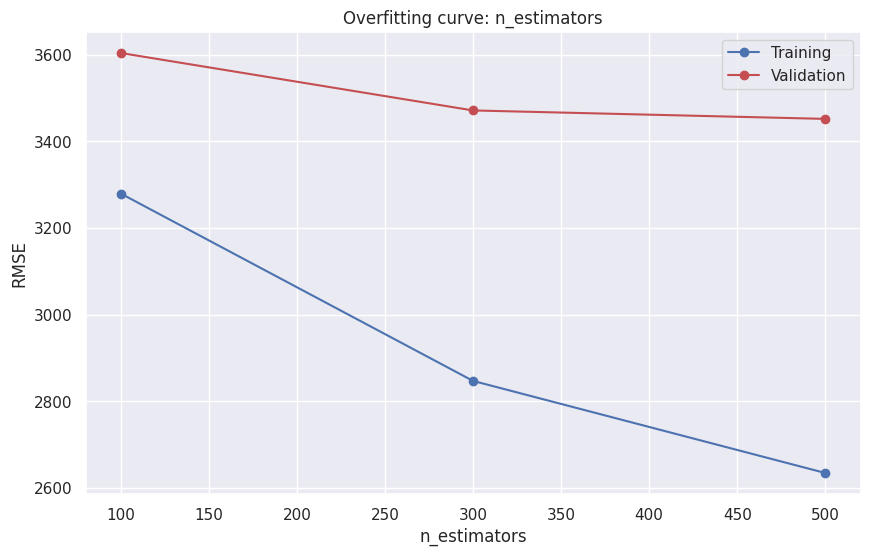

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100,300,500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 300 for now.

In [ ]:
best_params['n_estimators'] = 300

### Max Depth

CPU times: user 11min 31s, sys: 2.28 s, total: 11min 33s
Wall time: 8min 35s


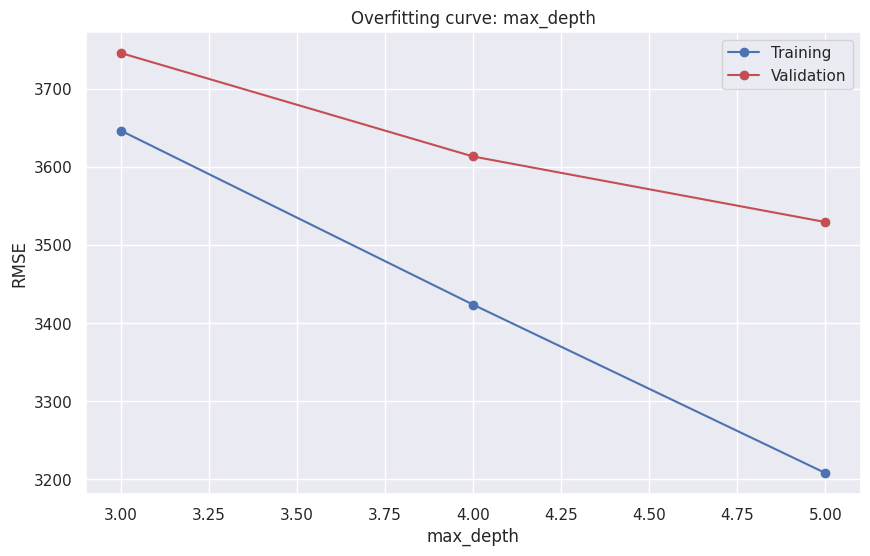

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

In [ ]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 14min 10s, sys: 3.1 s, total: 14min 13s
Wall time: 10min 2s


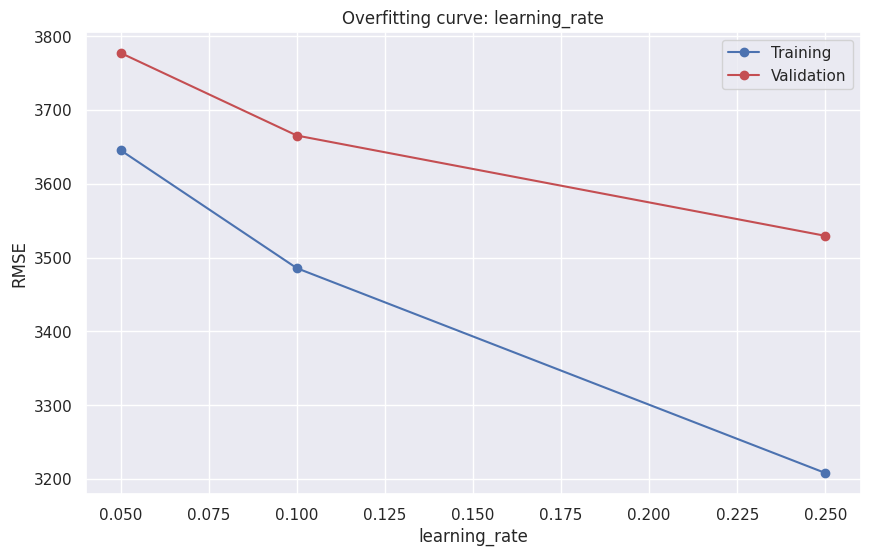

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.

In [ ]:
best_params['learning_rate'] = 0.25

### Colsample_Bytree

CPU times: user 27min 5s, sys: 5.68 s, total: 27min 10s
Wall time: 19min 44s


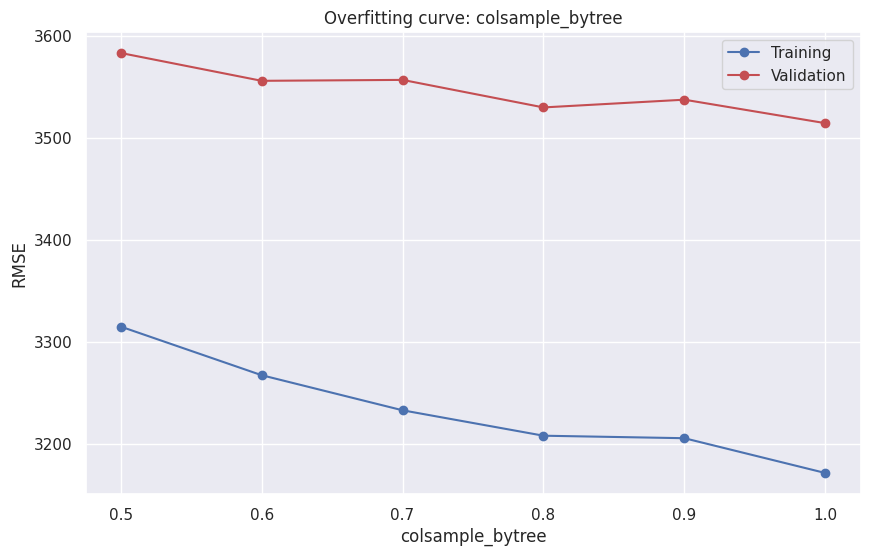

In [ ]:
%%time
test_param_and_plot(XGBRegressor, 'colsample_bytree', [0.5, 0.6, 0.7,0.8,0.9,1], **best_params)

The best colsample_bytree value is 0.8.

In [ ]:
best_params['colsample_bytree'] = 0.8

In [ ]:
best_params

{'random_state': 42,
 'n_jobs': -1,
 'objective': 'reg:squarederror',
 'n_estimators': 300,
 'max_depth': 5,
 'learning_rate': 0.25,
 'colsample_bytree': 0.8}

In [ ]:
test_params1(learning_rate =0.25,n_estimators=500, max_depth=5, colsample_bytree=0.8, objective='reg:squarederror')

((3016.7502930178375,
  3474.509424713987,
  array([  775.17  ,  1351.6768,  2227.4375, ..., 17788.727 ,  2046.7758,
          2292.5208], dtype=float32),
  array([2424.32  , 2817.506 , 1046.8326, ..., 5615.416 , 2650.383 ,
          999.8583], dtype=float32)),
 (3590.3184734644246,
  array([27200.133 ,  1714.4338,  3523.7632, ...,  3166.5386,   911.2132,
           539.6995], dtype=float32)))

So these are the final values after tuning the above hyperparameters :

Train RMSE : 3016

Validation RMSE : 3474

Test RMSE : 3590

**Now let us do the hyperparameter tuning for our Random Forest Model**

In [ ]:
def test_params(**params):
    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(x_train, train_target)
    return evaluate(model), predict(model)

In [ ]:
test_params(max_depth=30, n_estimators=100, min_samples_split = 2, min_samples_leaf = 4)

<ipython-input-333-13d90062ff20>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, train_target)


((2742.1113498981013,
  3599.7438369632778,
  array([  845.43405549,  2131.78218079,  3728.17932925, ...,
         21160.48004622,  1440.13954455,  2477.55037524]),
  array([2546.9265478 , 1171.40565185, 1276.84580484, ..., 6284.46621328,
         2403.06889416, 1072.19319895])),
 (3711.2078451739258,
  array([29990.00825622,  1168.97298163,  4311.47683179, ...,
          3400.5992475 ,   814.88712637,  2672.00355428])))

Initial Training RMSE : ~\$3567
Initial Validation RMSE : ~\$3897
Initial Test RMSE : ~\$3993

After Hyperparameter tuning done above,

Training RMSE : \$2742
Validation RMSE : \$3599
Test RMSE : \$3711


**We could calculate the most optimal values for the hyper parameters in the same way like we did for our Gradient Boosting model.**

Le us look at the example for reference :

### No. of Trees

<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)


CPU times: user 40min 52s, sys: 9.96 s, total: 41min 2s
Wall time: 28min 46s


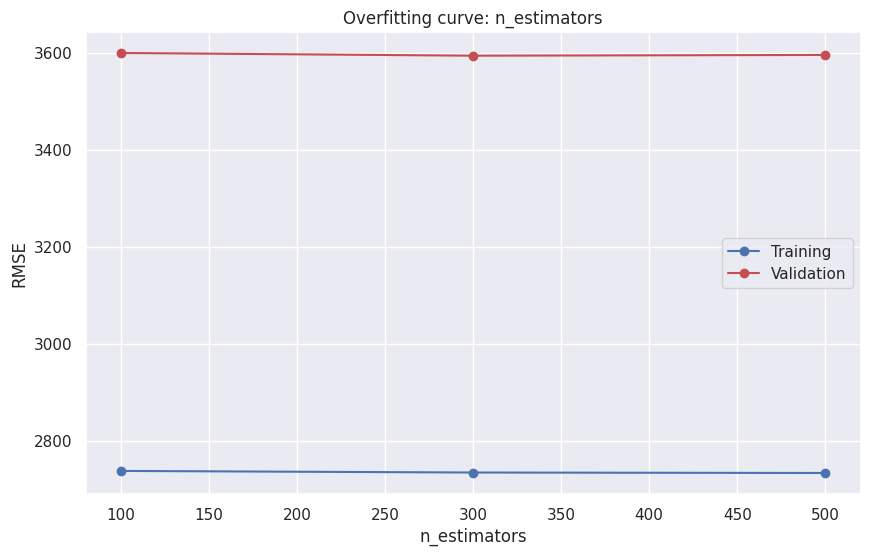

In [ ]:
%%time
test_param_and_plot(RandomForestRegressor, 'n_estimators', [100,300,500], **best_params)

Seems like 300 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 200 for now.

### min_samples_split

<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)


CPU times: user 17min 34s, sys: 6.57 s, total: 17min 40s
Wall time: 17min 52s


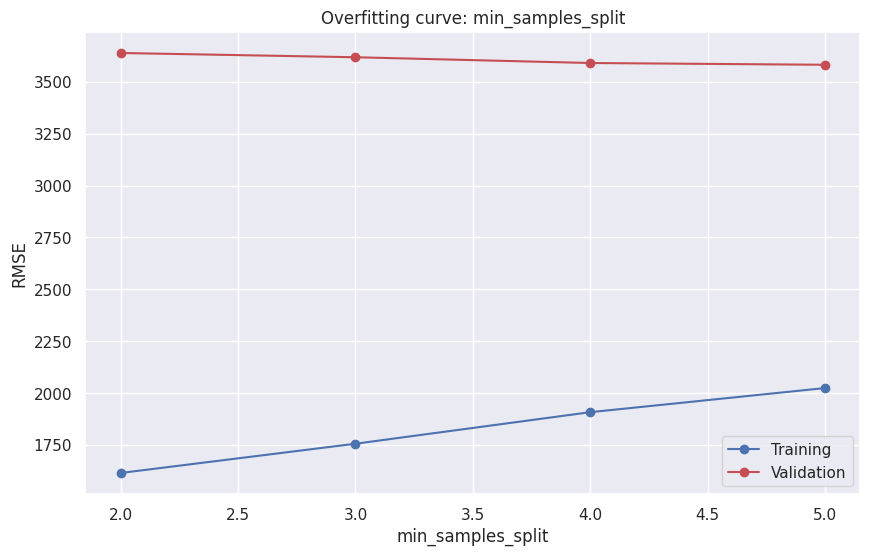

In [ ]:
%%time
test_param_and_plot(RandomForestRegressor, 'min_samples_split', [2, 3,4,5])

So best minimum samples split is 2.

### max_depth

<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipython-input-328-528165188321>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = ModelClass(**params).fit(x_train, train_target)
<ipy

CPU times: user 44min 8s, sys: 8.26 s, total: 44min 16s
Wall time: 30min 47s


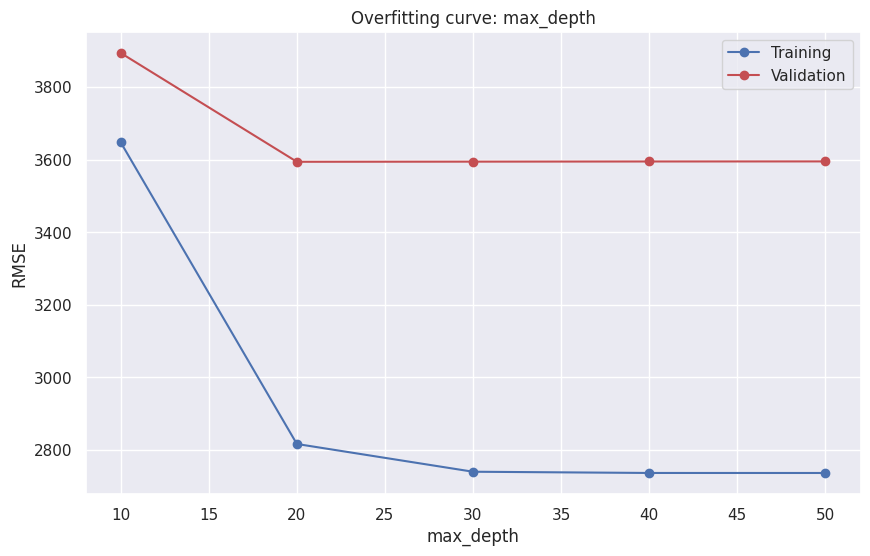

In [ ]:
%%time
test_param_and_plot(RandomForestRegressor, 'max_depth', [10, 20, 30,40,50], n_estimators=200, min_samples_split = 2, min_samples_leaf = 4, random_state= 42, n_jobs = -1)

Looks like a max depth of 30 is ideal.

In [ ]:
test_params(max_depth=30, n_estimators=200, min_samples_split = 2, min_samples_leaf = 4)

<ipython-input-333-13d90062ff20>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, train_target)


((2739.4642565664685,
  3594.510338495858,
  array([  828.08319626,  1980.04106406,  3494.81786044, ...,
         21012.96431805,  1452.98600223,  2600.00279264]),
  array([2501.75878252, 1192.03058713, 1319.99576788, ..., 6166.56910969,
         2482.49501025, 1071.46237383])),
 (3708.944935791919,
  array([30514.27887503,  1127.03626246,  4238.79920514, ...,
          3435.94513086,   810.04882452,  2800.80946297])))

We got :Training RMSE : \$2739
Validation RMSE : \$3594
Test RMSE : \$3708


### Summary

Let u look at the final RMSE values from all our models and figure out the best model for our price prediction.

<img src="https://imgur.com/hnxtuVx.png" >

As we can see, Gradient Boosting gave us the best RMSE Values, i.e. the most accurate Price prediction for a Used car.

On the test se, We have a RMSE value of ~3590 which is not bad considering the car price ranges, so a deviation of +-3590 is acceptable when predicting the prices of a used car.

## **References**

* Dataset: [Used Cars Dataset(371k Cars)](https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices)

* Opendatsets library: https://github.com/JovianML/opendatasets
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com
* harshit-gupta3085 notebook of used car prediction: https://jovian.com/harshit-gupta3085/predict-used-cars-prices
* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs